In [10]:
import glob
import time

import numpy as np
import matplotlib.pyplot as plt

from CCfun import compute_baseline_int
from CCfun import compute_baseline_float
from CCfun import datetime_from_spectrm

from CCfit import fit
from CCfit import shifted_gauss

from CCio  import load_ccd_file

In [ ]:
def orderer(filename):
    basename = filename.split("/")[-1]
    tokens   = basename.split("_")
    index    = 0
    for token in tokens:
        if token[0].isdigit():
            index = 100 * index + int(token)
    return index

def fit_caf_600(spectrum):
    x, y = spectrum.em_wl, spectrum.counts
    y   -= compute_baseline_int(y)
    y   /= spectrum.power.mean() 
    y   -= compute_bsaeline_float(y)
    sel  = x > spectrum.ex_wl + 30
    x, y = x[sel], y[sel]

    seed = np.max(y), 770, 30, 0
    f    = fit(shifted_gauss, x, y, seed, fit_range=(600, 950), maxfev=int(1e5))
    
    return f.values[0] / np.diff(x).mean()

In [8]:
%matplotlib notebook

In [ ]:
data_path = "D:\\"

<IPython.core.display.Javascript object>


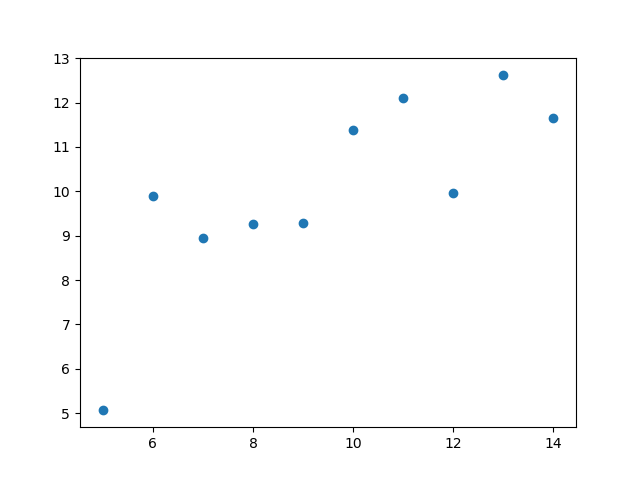

In [9]:
fig = plt.figure()
ax  = fig.add_subplot(111)
plt.ion()

fig.show()
fig.canvas.draw()

times     = []
integrals = []
analyzed  = []

t0 = time.time()

while True:
    filenames = sorted(glob.glob(os.path.join(data_path, "*signal*")), key=orderer)
    
    for filename in filter(lambda f: f not in analyzed, filenames):
        spectrum = load_ccd_file(filename)
        t        = datetime_from_spectrum(spectrum).timestamp()
        integral = fit_caf_600(spectrum)
        
        times    .append(t - t0)
        integrals.append(integral)
        analyzed .append(filename)
    
    ax.clear()
    ax.scatter(times, integrals)
    fig.canvas.draw()
    t0 = np.min(times)

    time.sleep(60)